In [1]:
'''Stock Price Analysis and Daily Return Visualization'''
# Import libraries
!pip install -q yfinance
!pip install -q matplotlib 
!pip install -q seaborn 
#! runs a terminal command and downloads yfinance package
import yfinance as yf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
def analyse_stock(ticker, start="2022-01-01", end="2025-08-01"):
    data = yf.download(ticker, start=start, end=end, auto_adjust = True)

    if data.empty:
        print (f"No data found for {ticker}")
        return

        
    data.columns = [' '.join(col).strip() for col in data.columns.values]
    data.head()

    #Drop rows with missing Close prices
    data = data.dropna(subset=[f'Close {ticker}'])
    #Calculate Daily Returns
    data['Daily Return'] = data[f'Close {ticker}'].pct_change()
    #Drop the first NaN in Daily Return
    data = data.dropna(subset=['Daily Return'])

    #Plot closing price
    plt.figure(figsize=(12,6))
    plt.plot(data[f'Close {ticker}'], label=f"{ticker} Close Price")
    plt.title(f"{ticker} Stock Price (2022-2025)")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.show()


    #Overall price trend
    start_price = data[f'Close {ticker}'].iloc[0]
    end_price = data[f'Close {ticker}'].iloc[-1]
    trend_pct = ((end_price - start_price)/start_price)*100
  

    if trend_pct > 0:
        print(f" {ticker} rose by {trend_pct:.2f}% between {data.index[0].date()} and {data.index[-1].date()}.")
    elif trend_pct < 0:
        print(f" {ticker}  by {trend_pct:.2f}% between {data.index[0].date()} and {data.index[-1].date()}.")
    else:
        print(f" {ticker} has no net change between {data.index[0].date()} and {data.index[-1].date()}.")


    #Plot Daily Return Distribution
    plt.figure(figsize=(12,6))
    sns.histplot(data['Daily Return'], bins=50, kde=True)
    plt.title(f"{ticker} Daily Returns Distribution")
    plt.show()

    #absolute extremes 
    #largest single day drop
    min_returns = data['Daily Return'].min() * 100
    #largest single day gain
    max_returns = data['Daily Return'].max() * 100

    # 1-99% quartile (robust range)
    low, high = data['Daily Return'].quantile([0.01,0.99]) * 100


    #Average daily return and volatility
    avg_daily_return = data['Daily Return'].mean() * 100
    daily_volatility = data['Daily Return'].std() * 100
    
    # Annualized return (assuming 252 trading days/year)
    annualised_return = ((1 + avg_daily_return/100) ** 252 -1 ) * 100

    # Annualized volatility
    annualised_volatility = daily_volatility * np.sqrt(252)


    #automatic labels for wording
    trend_direction = "upward" if trend_pct > 0 else "downward"
    min_label = "drop" if min_returns < 0 else "gain"
    max_label = "gain" if max_returns > 0 else "drop"
    avg_direction = "increase" if avg_daily_return > 0 else "decrease"
    #volatility < 30 is moderate and often acceptable amount of risk
    volatility_level = "moderate" if annualised_volatility < 30 else "high"

    #summary of stock growth vs risk
    if trend_pct > 0 and annualised_volatility < 30:
        profile =  f"{ticker} shows strong growth potential with relatively moderate short-term fluctuations."
    elif trend_pct > 0 and annualised_volatility >= 30:
        profile = f"{ticker} offers high growth potential but experiences significant short-term volatility."
    elif trend_pct <= 0 and annualised_volatility < 30:
        profile = f"{ticker} has shown limited growth and relatively low volatility, suggesting a stable but underperforming trend."
    else:
        profile = f"{ticker} faces downside risk and high volatility, indicating a more unpredictable performance." 
   
    
    #changes date to a string format using strftime
    end_date_str = data.index[-1].strftime("%b %Y")

    start_date_str = data.index[0].strftime("%b %Y")


    insights = [
    f"**Price Growth:** {ticker} rose by approximately **{trend_pct:.0f}%** between {start_date_str} and {end_date_str}, showing a clear {trend_direction} trend over the period.",
    f"**Daily Returns:** Daily returns ranged from **{min_returns:.2f}%** (largest single-day {min_label}) to **{max_returns:.2f}%** (largest single-day {max_label}).",
    f"**Typical Daily Returns (1st–99th pct):** Most daily returns (1st-99th percentile) fell between {low:.2f}% and {high:.2f}%, showing typical day-to-day variability.",
    f"**Average Daily Return:** On average, {ticker}'s daily return was **{avg_daily_return:.2f}%**, corresponding to an annualised return of around **{annualised_return:.2f}%**, showing an overall {avg_direction}.",
    f"**Volatility:** The stock exhibits a daily volatility of about **{daily_volatility:.2f}%**, annualising to roughly **{annualised_volatility:.2f}%**, reflecting a {volatility_level} level of risk.",
    f"**Risk-Return Profile:** {profile}"
    ]


    from IPython.display import display, Markdown
    
    # Combine all insights into a single markdown string
    markdown_text = f"# Key Insights for {ticker}\n\n"  # Heading
    for line in insights:
        markdown_text += f"- {line}\n"  # Bullet points
    
    # Display as markdown in JupyterLab
    display(Markdown(markdown_text))
   
    return 

[*********************100%***********************]  1 of 1 completed


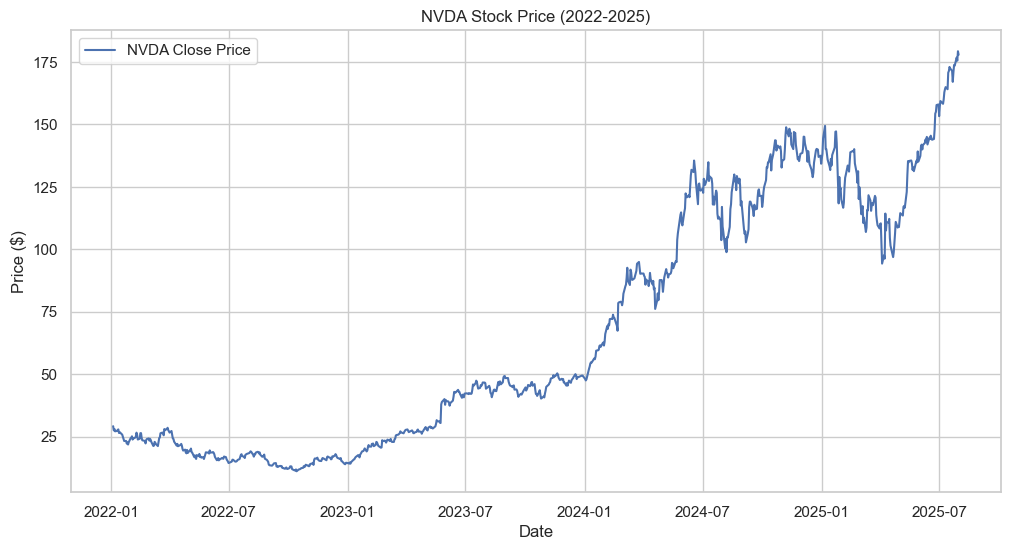

 NVDA rose by 508.38% between 2022-01-04 and 2025-07-31.


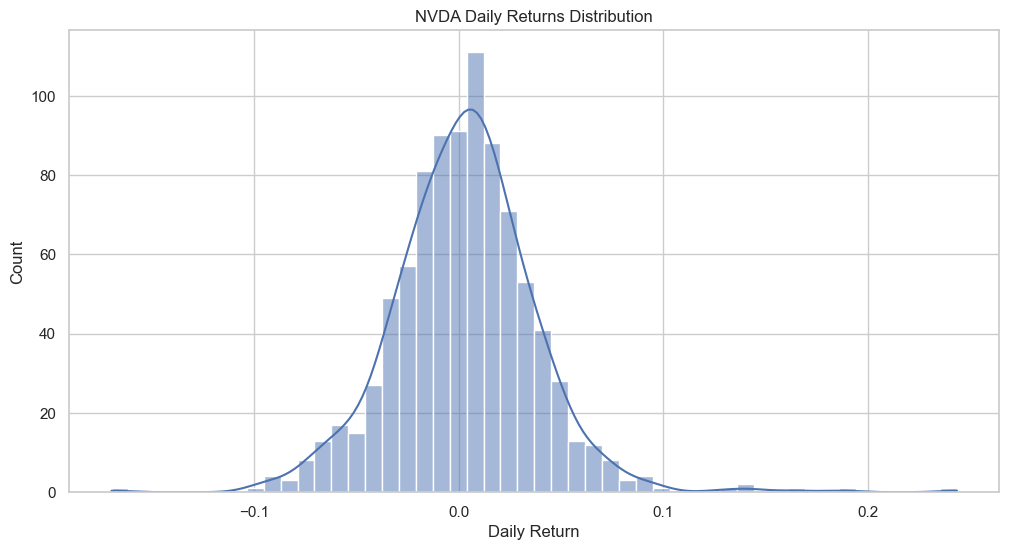

# Key Insights for NVDA

- **Price Growth:** NVDA rose by approximately **508%** between Jan 2022 and Jul 2025, showing a clear upward trend over the period.
- **Daily Returns:** Daily returns ranged from **-16.97%** (largest single-day drop) to **24.37%** (largest single-day gain).
- **Typical Daily Returns (1st–99th pct):** Most daily returns (1st-99th percentile) fell between -7.83% and 9.19%, showing typical day-to-day variability.
- **Average Daily Return:** On average, NVDA's daily return was **0.26%**, corresponding to an annualised return of around **92.22%**, showing an overall increase.
- **Volatility:** The stock exhibits a daily volatility of about **3.52%**, annualising to roughly **55.81%**, reflecting a high level of risk.
- **Risk-Return Profile:** NVDA offers high growth potential but experiences significant short-term volatility.


In [3]:
analyse_stock("NVDA")

[*********************100%***********************]  1 of 1 completed


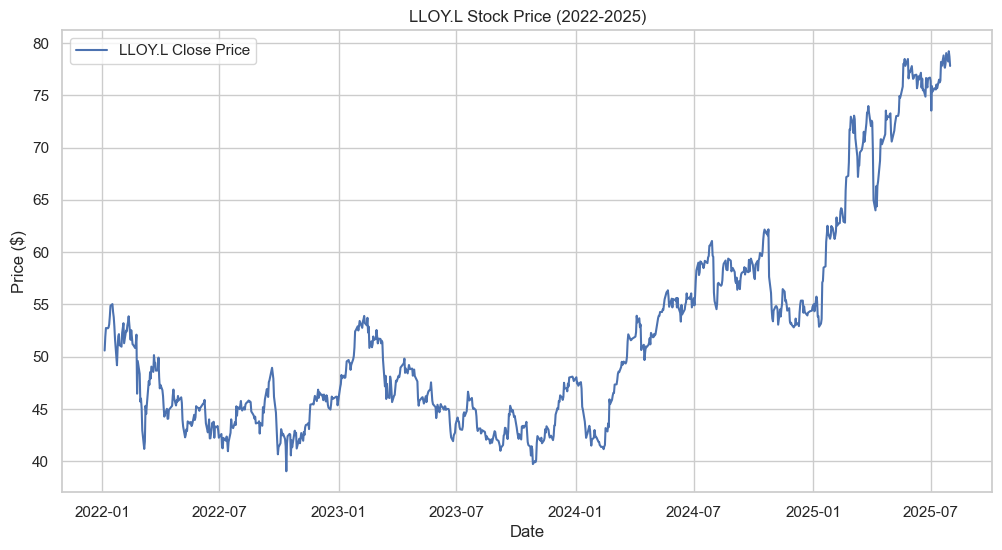

 LLOY.L rose by 53.82% between 2022-01-05 and 2025-07-31.


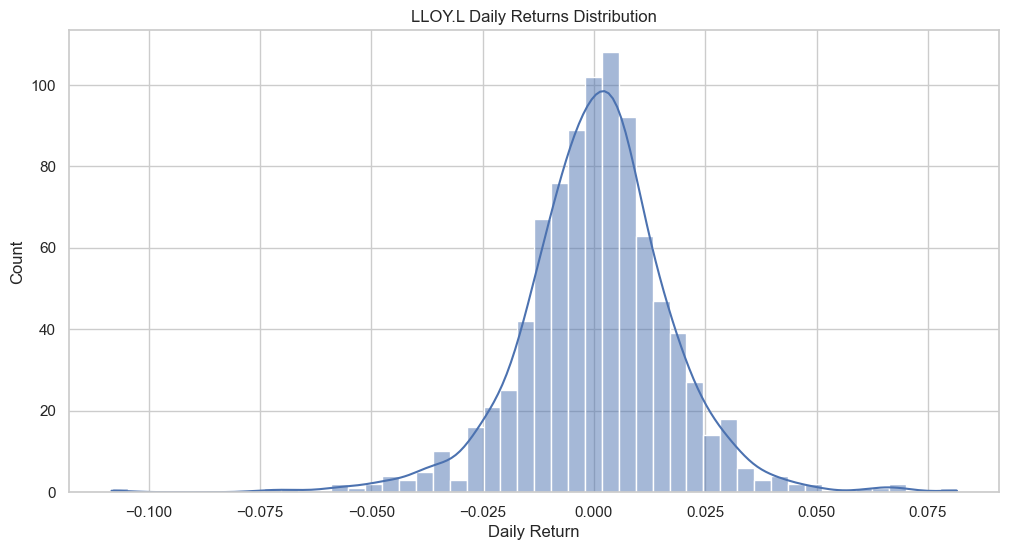

# Key Insights for LLOY.L

- **Price Growth:** LLOY.L rose by approximately **54%** between Jan 2022 and Jul 2025, showing a clear upward trend over the period.
- **Daily Returns:** Daily returns ranged from **-10.83%** (largest single-day drop) to **8.15%** (largest single-day gain).
- **Typical Daily Returns (1st–99th pct):** Most daily returns (1st-99th percentile) fell between -4.68% and 4.11%, showing typical day-to-day variability.
- **Average Daily Return:** On average, LLOY.L's daily return was **0.06%**, corresponding to an annualised return of around **17.44%**, showing an overall increase.
- **Volatility:** The stock exhibits a daily volatility of about **1.69%**, annualising to roughly **26.83%**, reflecting a moderate level of risk.
- **Risk-Return Profile:** LLOY.L shows strong growth potential with relatively moderate short-term fluctuations.


In [4]:
analyse_stock("LLOY.L")

[*********************100%***********************]  1 of 1 completed


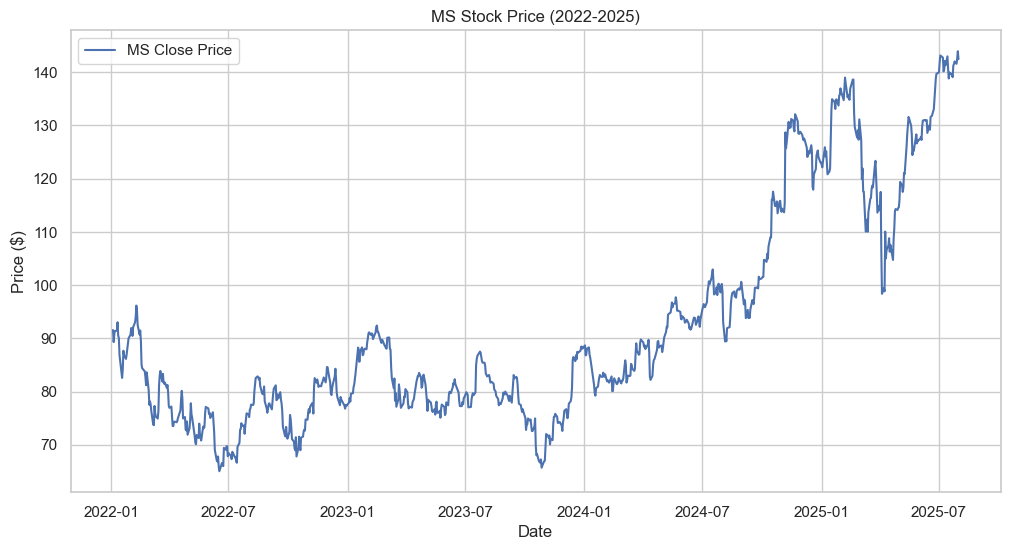

 MS rose by 55.60% between 2022-01-04 and 2025-07-31.


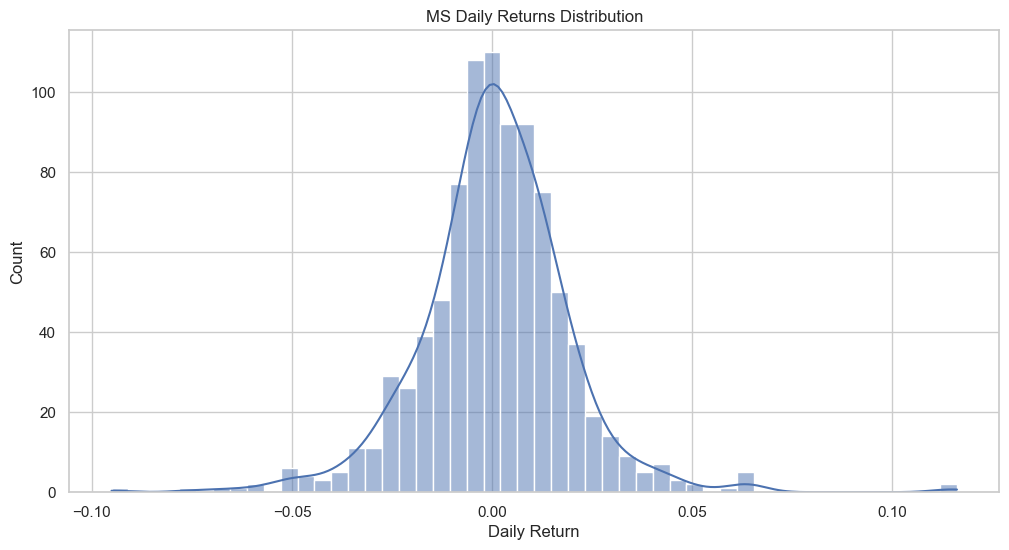

# Key Insights for MS

- **Price Growth:** MS rose by approximately **56%** between Jan 2022 and Jul 2025, showing a clear upward trend over the period.
- **Daily Returns:** Daily returns ranged from **-9.51%** (largest single-day drop) to **11.61%** (largest single-day gain).
- **Typical Daily Returns (1st–99th pct):** Most daily returns (1st-99th percentile) fell between -5.07% and 4.92%, showing typical day-to-day variability.
- **Average Daily Return:** On average, MS's daily return was **0.07%**, corresponding to an annualised return of around **19.62%**, showing an overall increase.
- **Volatility:** The stock exhibits a daily volatility of about **1.86%**, annualising to roughly **29.59%**, reflecting a moderate level of risk.
- **Risk-Return Profile:** MS shows strong growth potential with relatively moderate short-term fluctuations.


In [5]:
analyse_stock("MS")